<a href="https://colab.research.google.com/github/fear-the-lord/Image-Segmentation/blob/master/Road_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 4083 (delta 64), reused 66 (delta 31), pack-reused 3966
Receiving objects: 100% (4083/4083), 141.50 MiB | 31.87 MiB/s, done.
Resolving deltas: 100% (1024/1024), done.
Checking out files: 100% (4050/4050), done.


In [4]:
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17452 sha256=6c753df85ffbbe3da62496db1da533a18ec692f9dca71d8901912255af0f2b37
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
     |████████████████████████████████| 411.5MB 36kB/s 
     |████████████████████████████████| 512kB 44.8MB/s 
     |████████████████████████████████| 3.8MB 43.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c743549a3afc5ad984052029bc47976cf417f9dcd62d1de3170f252e87180dd5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requir

In [0]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [6]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [0]:
gtf = Infer();

In [0]:
classes_dict = {
    'background': 0,
    'road': 1
};
classes_to_train = ['road'];

In [0]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[1500, 1500])

In [10]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R" -O seg_road_trained.zip && rm -rf /tmp/cookies.txt

--2020-06-10 08:29:17--  https://docs.google.com/uc?export=download&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.102, 172.217.203.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-06-10 08:29:17 (53.4 MB/s) - written to stdout [3256]

--2020-06-10 08:29:17--  https://docs.google.com/uc?export=download&confirm=hZp_&id=1xGBGpttQs1XxXJJnP9HSRo3yCZH4dj4R
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.102, 172.217.203.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-a0-docs.googleusercontent.com/docs/securesc/ep69vlsqk0mm57shrodf6023n6p9of3d/cm

In [0]:
! unzip -qq seg_road_trained.zip

In [0]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='seg_road_trained/best_model.h5')

In [13]:
gtf.Setup();












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
44113920/44107200 [==============================] - 1s 0us/step






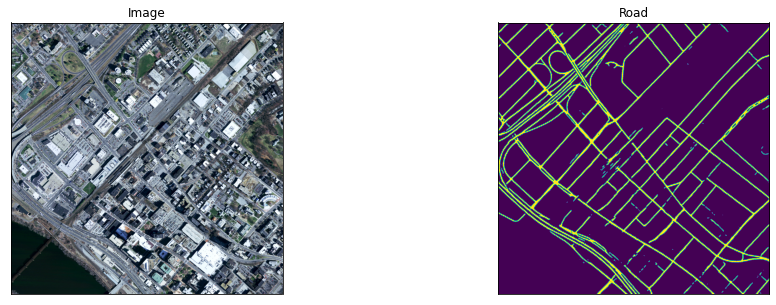

In [14]:
gtf.Predict("seg_road_trained/test/img-1.png", vis=True);

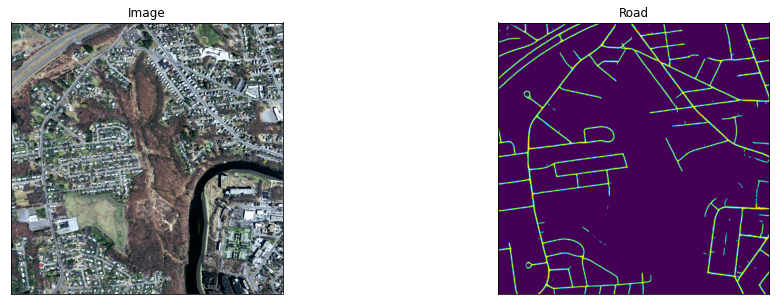

In [15]:
gtf.Predict("seg_road_trained/test/img-2.png", vis=True);

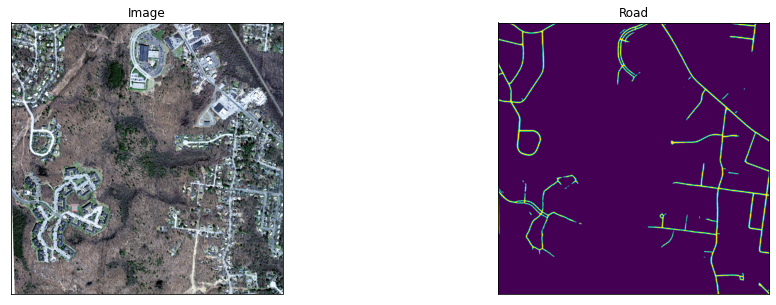

In [16]:
gtf.Predict("seg_road_trained/test/img-10.png", vis=True);

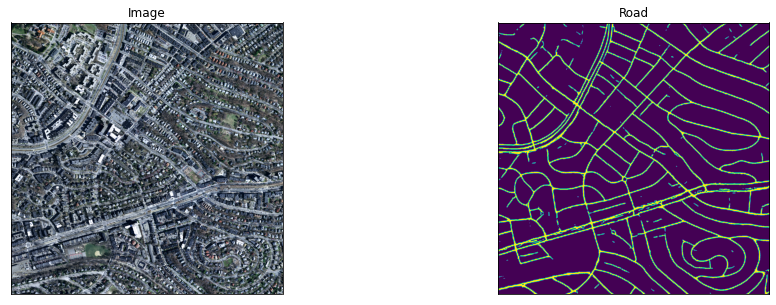

In [17]:
gtf.Predict("seg_road_trained/test/img-7.png", vis=True);